In [1]:
import pandas as pd;import math;import numpy as np; import geopandas as gpd; import matplotlib as plt

Import Data

Note: Change the following command based on the location of the file in which the data exists

In [2]:
df1 = pd.read_csv("Data/siss_geo_indicatori_lineari_2016.csv", sep=",", encoding='utf-8')
df2 = pd.read_csv("Data/siss_geo_indicatori_lineari_2017.csv", sep=",", encoding='utf-8')
df3 = pd.read_csv("Data/siss_geo_indicatori_lineari_2018.csv", sep=",", encoding='utf-8')
df4 = pd.read_csv("Data/siss_geo_indicatori_lineari_2019.csv", sep=",", encoding='utf-8')
df5 = pd.read_csv("Data/siss_geo_indicatori_lineari_2020.csv", sep=",", encoding='utf-8')
df6 = pd.read_csv("Data/siss_geo_indicatori_lineari_2021.csv", sep=",", encoding='utf-8')
df7 = pd.read_csv("Data/siss_geo_indicatori_lineari_2022.csv", sep=",", encoding='utf-8')
df1['Year'] = 2016
df2['Year'] = 2017
df3['Year'] = 2018
df4['Year'] = 2019
df5['Year'] = 2020
df6['Year'] = 2021
df7['Year'] = 2022
df = pd.concat([df1, df2, df3, df4, df5, df6, df7], sort=False)

C:\Users\Asimina\AppData\Local\Temp\ipykernel_21144\2450062250.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("Data/siss_geo_indicatori_lineari_2016.csv", sep=",", encoding='utf-8')
C:\Users\Asimina\AppData\Local\Temp\ipykernel_21144\2450062250.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("Data/siss_geo_indicatori_lineari_2017.csv", sep=",", encoding='utf-8')
C:\Users\Asimina\AppData\Local\Temp\ipykernel_21144\2450062250.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv("Data/siss_geo_indicatori_lineari_2018.csv", sep=",", encoding='utf-8')
C:\Users\Asimina\AppData\Local\Temp\ipykernel_21144\2450062250.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv("Data/siss_geo_indicatori_li

General Information

In [3]:
print(df1.shape[0],df2.shape[0],df3.shape[0],df4.shape[0],df5.shape[0],df6.shape[0],df7.shape[0])
for ff in [df1, df2, df3, df4, df5, df6, df7,df]:
    print('***',ff['Year'].unique(),'***')
    ff['uid'] = ff['uuid'].str.upper()
    print(ff['uid'].nunique())
    print(ff['fk_l2'].nunique())
    print(ff['fk_l3'].nunique())
    print(ff['cod_comune'].nunique())
    print(ff['nr_incidenti'].sum())
    print(ff['nr_incidenti_feriti'].sum())
    print(ff['nr_incidenti_morti'].sum())
    print(ff['nr_feriti'].sum())
    print(ff['nr_morti'].sum())

484493 489584 500449 505506 507917 507917 520908
*** [2016] ***
484493
85095
1839
1203
10229
10110
210
14851
224
*** [2017] ***
489584
84523
1834
1202
10096
9965
232
14769
249
*** [2018] ***
500449
85352
1838
1198
10112
9998
210
14702
224
*** [2019] ***
505506
85763
1834
1182
10138
10036
195
14592
206
*** [2020] ***
507917
86134
1836
0
6986
6882
165
9623
178
*** [2021] ***
507917
86134
1835
0
9536
9419
176
13161
185
*** [2022] ***
520908
86431
1878
1181
9975
9840
215
13837
237
*** [2016 2017 2018 2019 2020 2021 2022] ***
540022
86987
1955
1215
67072
66250
1403
95535
1503


In [4]:
accidents = df[df['nr_incidenti'] > 0]
print('Road sections with accident:',accidents['uid'].nunique())
print('Percentage of road sections with accident:',accidents['uid'].nunique()/df['uid'].nunique()*100)
print('Average number of accidents in road sections with accidents (per year):',accidents['nr_incidenti'].mean())
df_grouped = accidents.groupby("uid")["nr_incidenti"].sum().reset_index()
print('Average number of accidents per road section during all the years (in road sections with accidents):',df_grouped['nr_incidenti'].mean())
print('Maximunm number of accidents in road section:',df_grouped['nr_incidenti'].max())


Road sections with accident: 37979
Percentage of road sections with accident: 7.0328616241560535
Average number of accidents in road sections with accidents (per year): 1.1975004463488663
Average number of accidents per road section during all the years (in road sections with accidents): 1.76602859474973
Maximunm number of accidents in road section: 96


In [5]:
uid_geometry = df.groupby(['uid']).agg({'geometria': 'nunique'})  
uuid_geometry2 = uid_geometry[uid_geometry['geometria'] > 1]
uuid_geometry3 = uid_geometry[uid_geometry['geometria'] < 2]
# print(uuid_geometry.shape[0],uuid_geometry2.shape[0], uuid_geometry.shape[0]/df.shape[0])
print('Unique road sections:',uid_geometry.shape[0])
print('Road sections with more than one geometry:',uuid_geometry2.shape[0])
print('Road sections with one geometry:',uuid_geometry3.shape[0])
print('Percentage of road sections with duplicate geometry:',uuid_geometry2.shape[0]/uid_geometry.shape[0]*100)

Unique road sections: 540022
Road sections with more than one geometry: 505160
Road sections with one geometry: 34862
Percentage of road sections with duplicate geometry: 93.5443370825633


Data Types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3516774 entries, 0 to 520907
Data columns (total 70 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   uuid                              object 
 1   fk_l3                             float64
 2   es_amm_nom                        object 
 3   fk_l2                             float64
 4   tp_str_nom                        object 
 5   cod_comune                        float64
 6   desc_comune                       object 
 7   flusso_medio_gior                 float64
 8   length_el_str                     float64
 9   nr_incidenti                      int64  
 10  nr_incidenti_feriti               int64  
 11  nr_incidenti_morti                int64  
 12  nr_feriti                         int64  
 13  nr_morti                          int64  
 14  inc_tr                            int64  
 15  inc_morti_tr                      int64  
 16  inc_feriti_tr                     int64  


Number of Missing (N/A) Values per Column:

In [7]:
df.isnull().sum(axis = 0)

uuid                     0
fk_l3              1382729
es_amm_nom         2879219
fk_l2               308515
tp_str_nom          439704
                    ...   
class_symbol9_t          0
class_line9_s            0
geometria                0
Year                     0
uid                      0
Length: 70, dtype: int64

Unique Values per Column (with N/A)

In [8]:
df.nunique(axis = 'rows', dropna = False)

uuid               1038039
fk_l3                 1956
es_amm_nom            3541
fk_l2                86988
tp_str_nom          114858
                    ...   
class_symbol9_t          4
class_line9_s            6
geometria          1140764
Year                     7
uid                 540022
Length: 70, dtype: int64

Accident Visualised:

In [9]:
accidents['geometria'] = gpd.GeoSeries.from_wkt(accidents['geometria'])
gdf1 = gpd.GeoDataFrame(accidents, geometry='geometria')
# gdf1['area'] = gdf1.geometry.area
gdf1['length'] = gdf1.geometry.length
gdf1['centroid'] = gdf1.geometry.centroid

C:\Users\Asimina\AppData\Local\Temp\ipykernel_21144\4159919597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents['geometria'] = gpd.GeoSeries.from_wkt(accidents['geometria'])


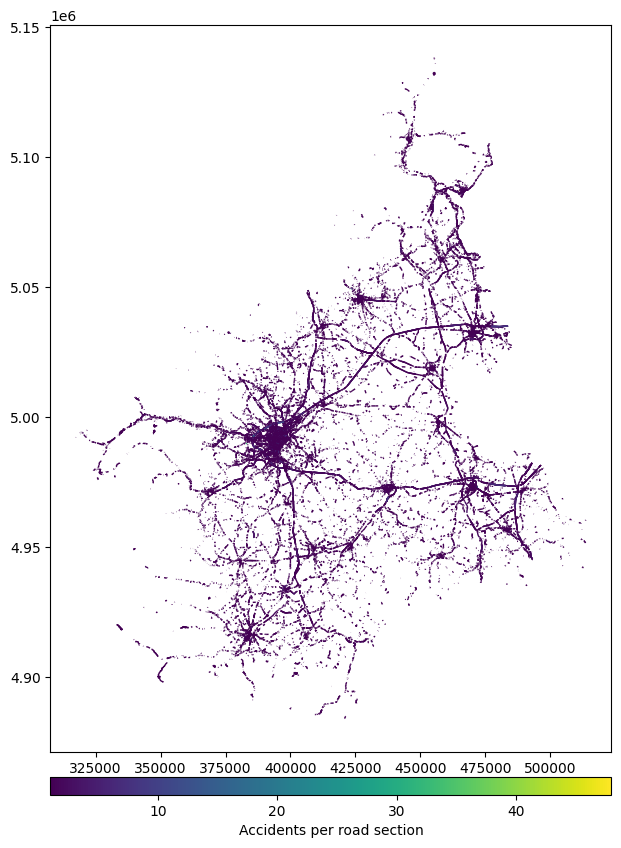

In [10]:
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(10, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="2.5%", pad=0.25)
gdf1.plot(
    column="nr_incidenti",
    # cmap='OrRd',
    linewidth=1,
    ax=ax,
    legend=True,
    cax=cax,
    legend_kwds={"label": "Accidents per road section", "orientation": "horizontal"},
);

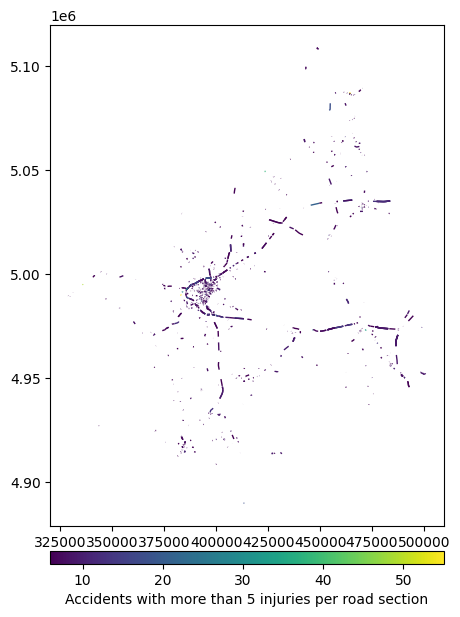

In [11]:
gdf2 = gdf1[gdf1['nr_feriti'] > 5]

from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(figsize=(7, 7))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="2.5%", pad=0.25)
gdf2.plot(
    column='nr_feriti',
    # cmap='OrRd',
    linewidth=1,
    ax=ax,
    legend=True,
    cax=cax,
    legend_kwds={"label": "Accidents with more than 5 injuries per road section", "orientation": "horizontal"},
);

Other Descriptive Diagrams: 

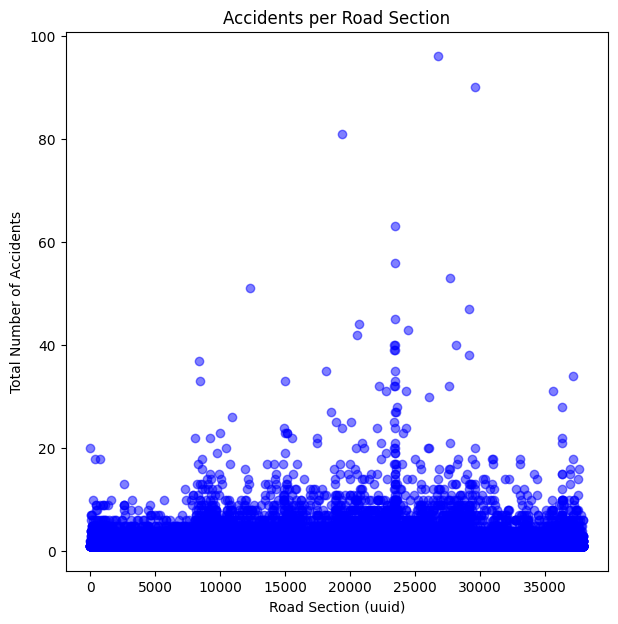

In [12]:
# Scatter plot
plt.figure(figsize=(7, 7))
plt.scatter(df_grouped.index, df_grouped["nr_incidenti"], alpha=0.5, color="blue")
# Labels and title
plt.xlabel("Road Section (uuid)")
plt.ylabel("Total Number of Accidents")
plt.title("Accidents per Road Section")
# Show plot
plt.show()


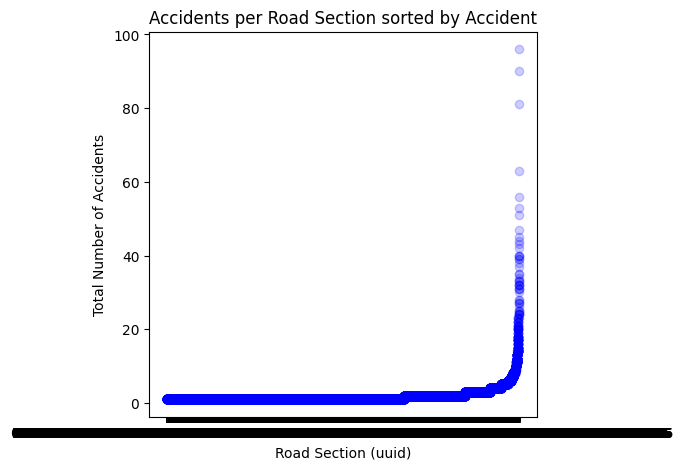

In [13]:
df_grouped_sorted = df_grouped.sort_values(by='nr_incidenti')
plt.figure(figsize=(5, 5))
plt.scatter(df_grouped_sorted['uid'], df_grouped_sorted["nr_incidenti"], alpha=0.2, color="blue")
plt.xlabel("Road Section (uuid)")
plt.ylabel("Total Number of Accidents")
plt.title("Accidents per Road Section sorted by Accident")
plt.show()

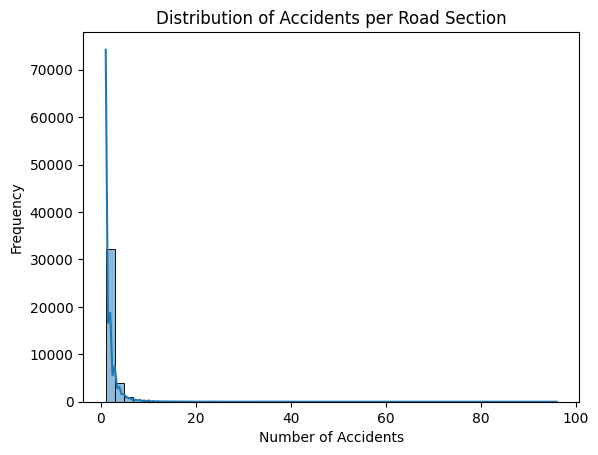

In [14]:
import seaborn as sns

# Histogram with KDE
sns.histplot(df_grouped["nr_incidenti"], bins=50, kde=True)
plt.xlabel('Number of Accidents')
plt.ylabel('Frequency')
plt.title('Distribution of Accidents per Road Section')
plt.show()

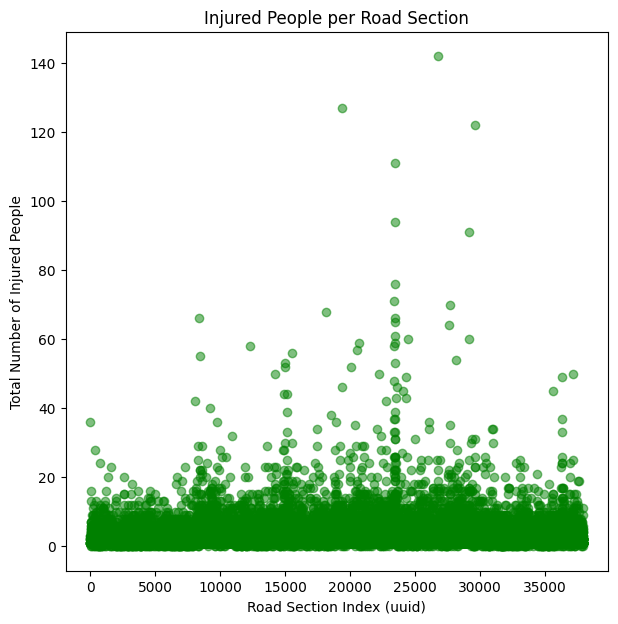

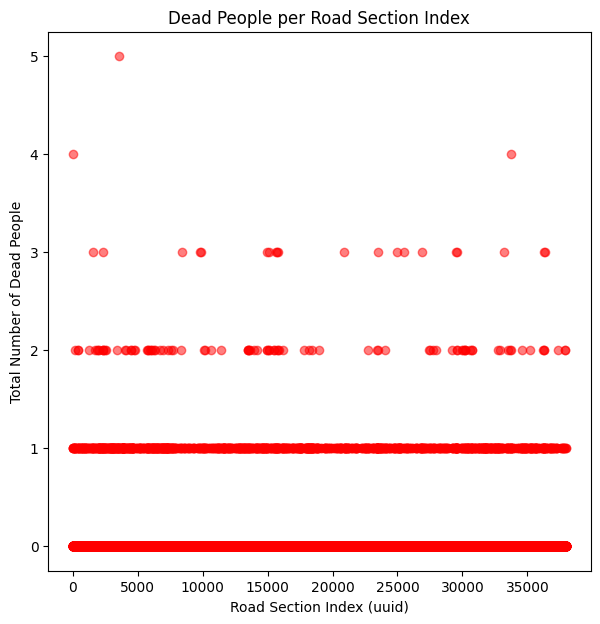

In [15]:
plt.figure(figsize=(7, 7))
accidents = df[df['nr_incidenti'] > 0]
df_grouped = accidents.groupby("uid")["nr_feriti"].sum().reset_index()
plt.scatter(df_grouped.index, df_grouped["nr_feriti"], alpha=0.5, color="green")
plt.xlabel("Road Section Index (uuid)")
plt.ylabel("Total Number of Injured People")
plt.title("Injured People per Road Section")
plt.show()
plt.figure(figsize=(7, 7))
df_grouped = accidents.groupby("uid")["nr_morti"].sum().reset_index()
plt.scatter(df_grouped.index, df_grouped["nr_morti"], alpha=0.5, color="red")
plt.xlabel("Road Section Index (uuid)")
plt.ylabel("Total Number of Dead People")
plt.title("Dead People per Road Section Index")
plt.show()

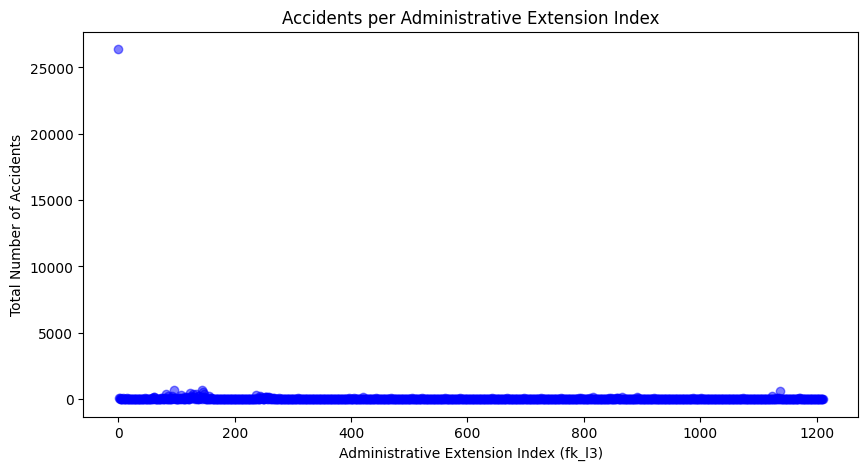

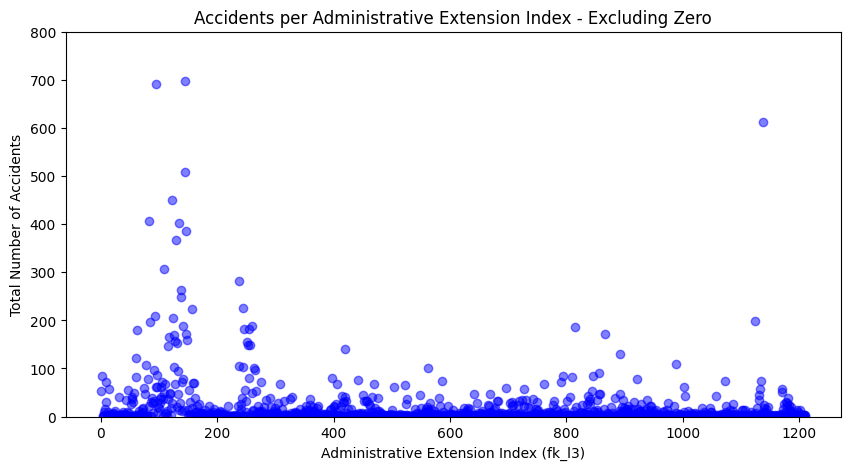

In [16]:
df_grouped = accidents.groupby("fk_l3", dropna=True)["nr_incidenti"].sum().reset_index()
df_grouped = df_grouped.sort_values(by='nr_incidenti')
plt.figure(figsize=(10, 5))
plt.scatter(df_grouped.index, df_grouped["nr_incidenti"], alpha=0.5, color="blue")
plt.xlabel("Administrative Extension Index (fk_l3)")
plt.ylabel("Total Number of Accidents")
plt.title("Accidents per Administrative Extension Index")
plt.show()
plt.figure(figsize=(10, 5))
plt.scatter(df_grouped.index, df_grouped["nr_incidenti"], alpha=0.5, color="blue")
plt.xlabel("Administrative Extension Index (fk_l3)")
plt.ylabel("Total Number of Accidents")
plt.title("Accidents per Administrative Extension Index - Excluding Zero")
plt.ylim(0,800)
plt.show()

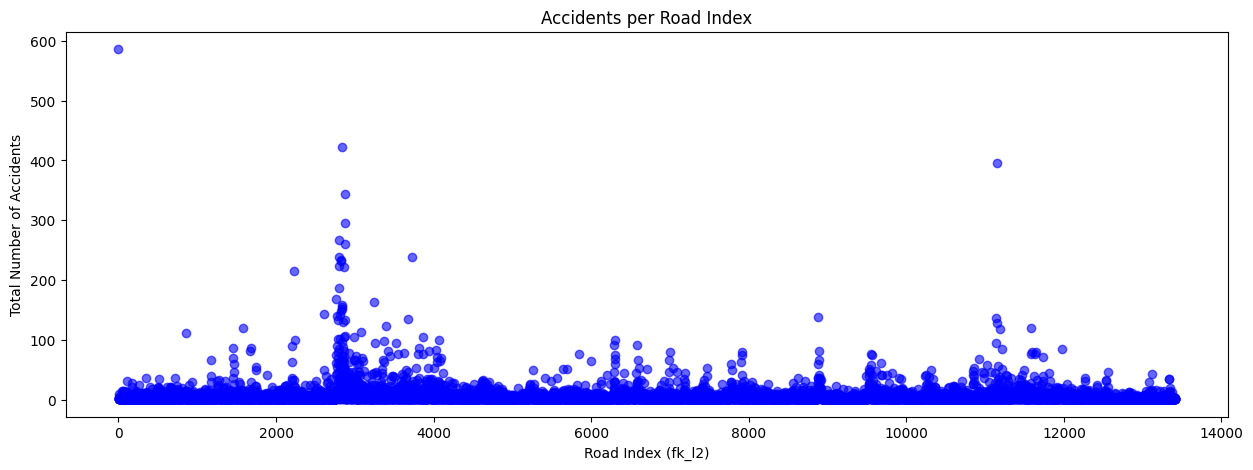

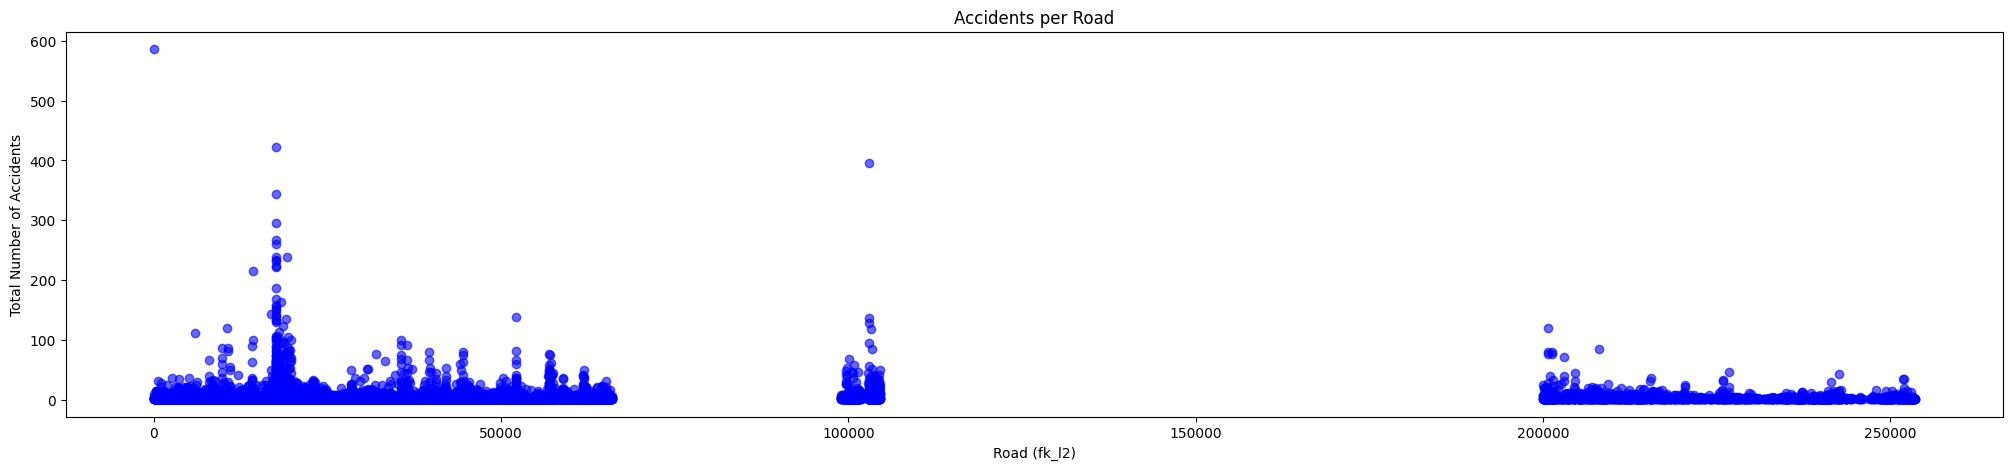

In [17]:
df_grouped = accidents.groupby("fk_l2", dropna=True)["nr_incidenti"].sum().reset_index()
df_grouped = df_grouped.sort_values(by='nr_incidenti')
plt.figure(figsize=(15, 5))
plt.scatter(df_grouped.index, df_grouped["nr_incidenti"], alpha=0.6, color="blue")
plt.xlabel("Road Index (fk_l2)")
plt.ylabel("Total Number of Accidents")
plt.title("Accidents per Road Index")
plt.show()

plt.figure(figsize=(25, 5))
plt.scatter(df_grouped['fk_l2'], df_grouped["nr_incidenti"], alpha=0.6, color="blue")
plt.xlabel("Road (fk_l2)")
plt.ylabel("Total Number of Accidents")
plt.title("Accidents per Road")
plt.show()


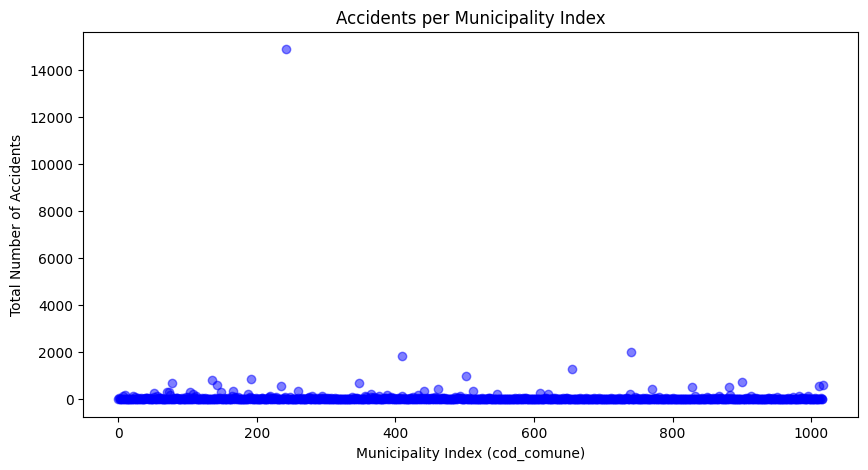

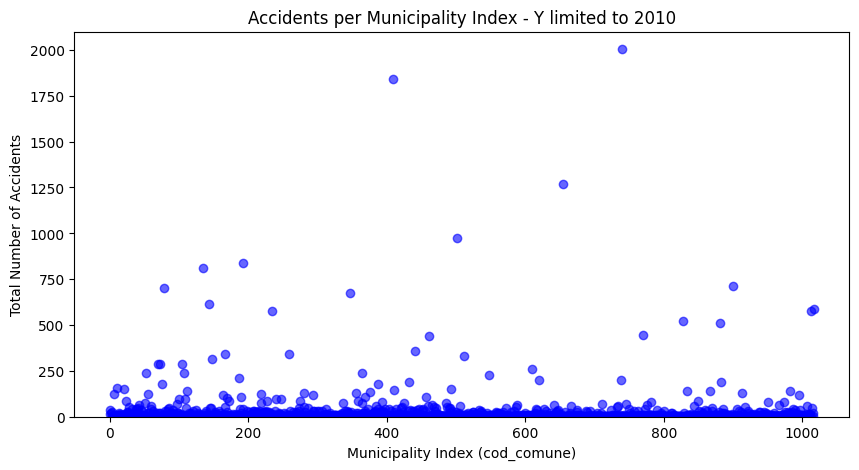

In [18]:
df_grouped = accidents.groupby("cod_comune", dropna=True)["nr_incidenti"].sum().reset_index()
df_grouped = df_grouped.sort_values(by='nr_incidenti')
# Scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(df_grouped.index, df_grouped["nr_incidenti"], alpha=0.5, color="blue")
plt.xlabel("Municipality Index (cod_comune)")
plt.ylabel("Total Number of Accidents")
plt.title("Accidents per Municipality Index")
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(df_grouped.index, df_grouped["nr_incidenti"], alpha=0.6, color="blue")
plt.xlabel("Municipality Index (cod_comune)")
plt.ylabel("Total Number of Accidents")
plt.title("Accidents per Municipality Index - Y limited to 2010")
plt.ylim(0,2100)
plt.show()

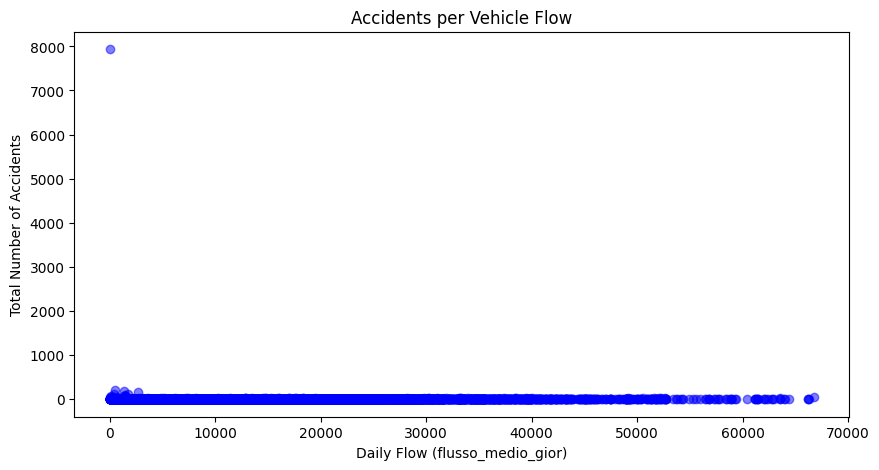

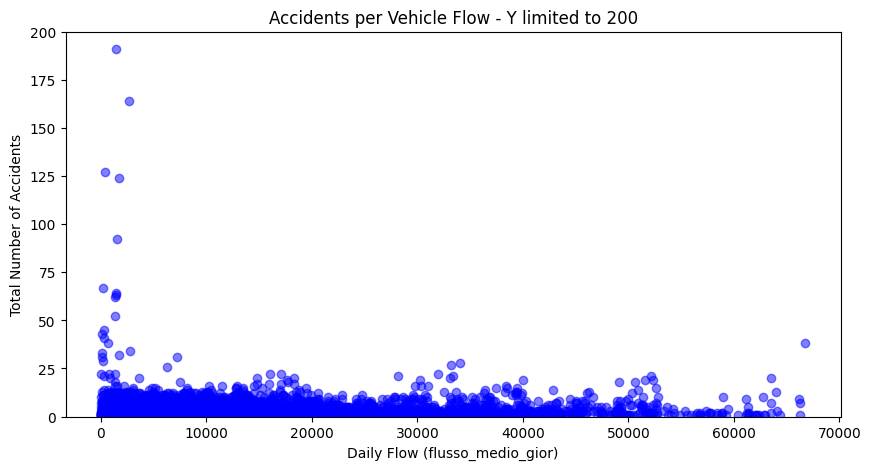

In [19]:
df_grouped = accidents.groupby("flusso_medio_gior", dropna=True)["nr_incidenti"].sum().reset_index()
df_grouped = df_grouped.sort_values(by='nr_incidenti')
plt.figure(figsize=(10, 5))
plt.scatter(df_grouped['flusso_medio_gior'], df_grouped["nr_incidenti"], alpha=0.5, color="blue")
plt.xlabel("Daily Flow (flusso_medio_gior)")
plt.ylabel("Total Number of Accidents")
plt.title("Accidents per Vehicle Flow")
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(df_grouped['flusso_medio_gior'], df_grouped["nr_incidenti"], alpha=0.5, color="blue")
plt.xlabel("Daily Flow (flusso_medio_gior)")
plt.ylabel("Total Number of Accidents")
plt.title("Accidents per Vehicle Flow - Y limited to 200")
plt.ylim(0,200)
plt.show()

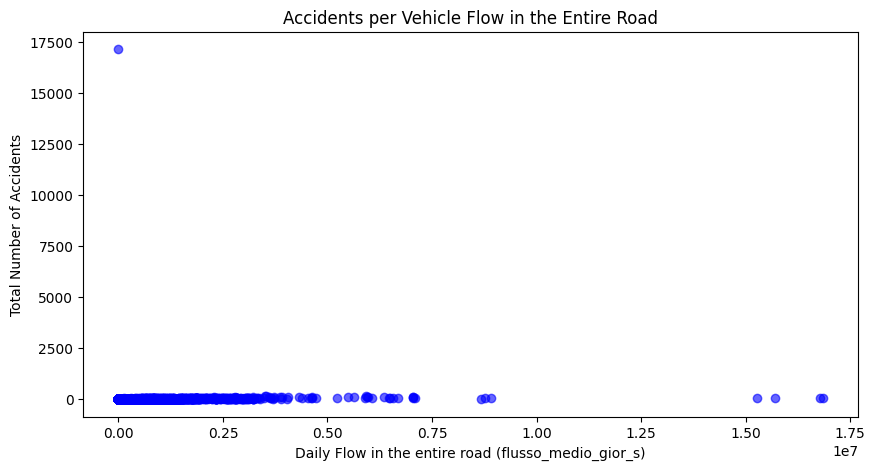

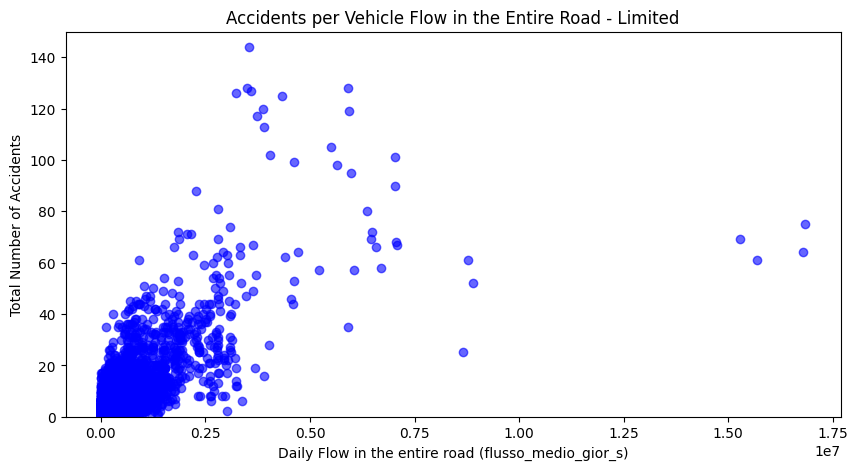

In [20]:
df_grouped = accidents.groupby("flusso_medio_gior_s", dropna=True)["nr_incidenti"].sum().reset_index()
df_grouped = df_grouped.sort_values(by='nr_incidenti')
plt.figure(figsize=(10, 5))
plt.scatter(df_grouped['flusso_medio_gior_s'], df_grouped["nr_incidenti"], alpha=0.6, color="blue")
plt.xlabel("Daily Flow in the entire road (flusso_medio_gior_s)")
plt.ylabel("Total Number of Accidents")
plt.title("Accidents per Vehicle Flow in the Entire Road")
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(df_grouped['flusso_medio_gior_s'], df_grouped["nr_incidenti"], alpha=0.6, color="blue")
plt.xlabel("Daily Flow in the entire road (flusso_medio_gior_s)")
plt.ylabel("Total Number of Accidents")
plt.title("Accidents per Vehicle Flow in the Entire Road - Limited")
plt.ylim(0,150)
plt.show()